In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

pd.set_option("display.precision", 3)

In [3]:
## clean orig raw data of patents counts and crispr, from base dataset
df_orig = pd.read_excel("crispr_patents_papers.xls",parse_dates=["Year"]).set_index("Year").drop(columns="crispr[majr]")
df_orig.to_csv("S2-crispr_patents_papers.csv",index=True)

In [6]:
df = pd.read_csv("S2-crispr_patents_papers.csv",parse_dates=["Year"]).set_index("Year")
df

,crispr,patents filed Count
Year,,
2002-01-01,0.177,0
2003-01-01,0.168,0
2004-01-01,0.156,0
2005-01-01,0.714,3
2006-01-01,0.933,11
2007-01-01,2.161,8
2008-01-01,3.345,22
2009-01-01,4.444,32
2010-01-01,5.732,13


In [7]:
df.columns

Index(['crispr', 'patents filed  Count'], dtype='object')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

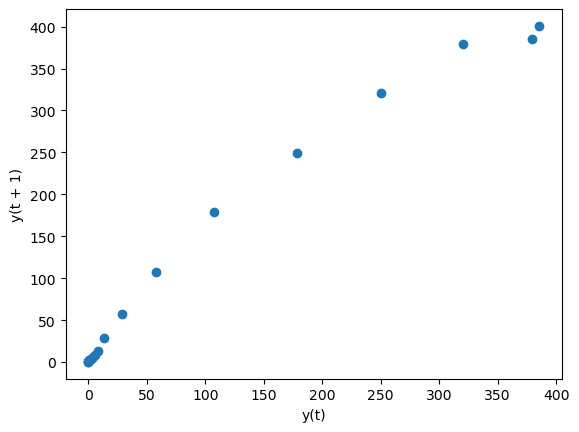

In [8]:
pd.plotting.lag_plot(df["crispr"], lag=1)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

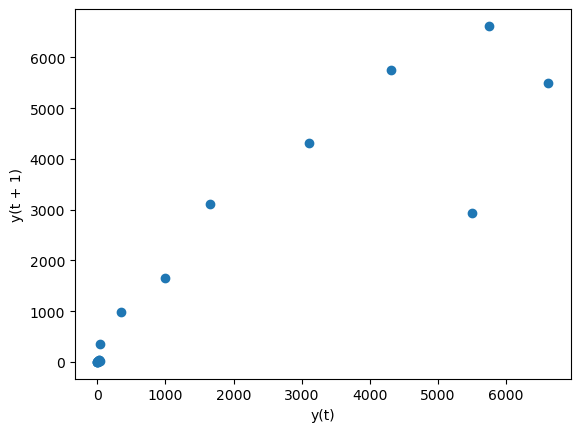

In [9]:
pd.plotting.lag_plot(df['patents filed  Count'], lag=1)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

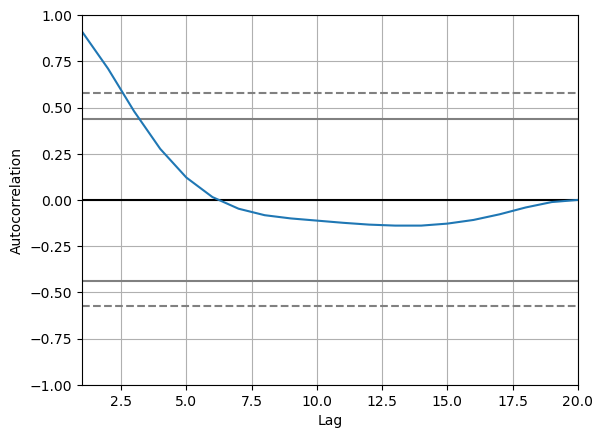

In [10]:
pd.plotting.autocorrelation_plot(df)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

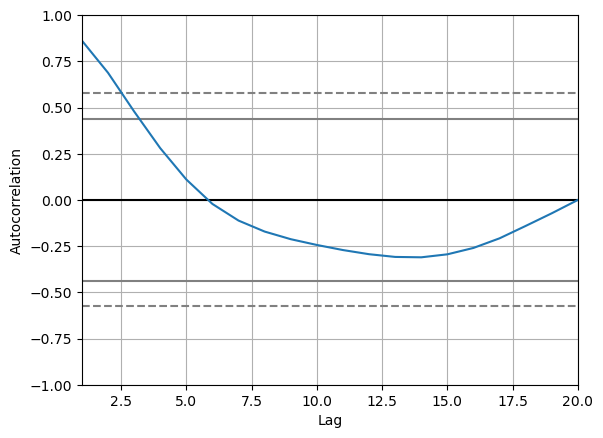

In [11]:
pd.plotting.autocorrelation_plot(df.iloc[:,0])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

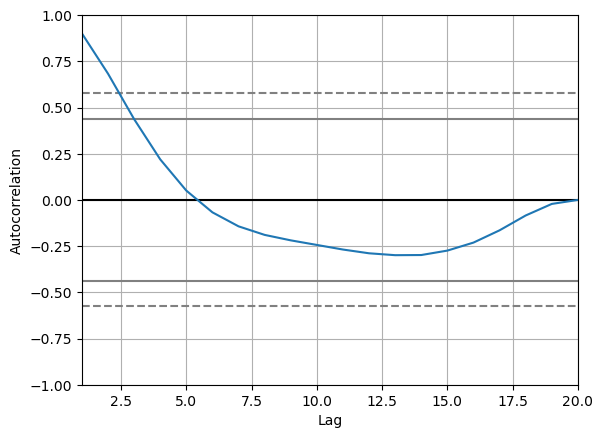

In [12]:
pd.plotting.autocorrelation_plot(df.iloc[:,1])

In [13]:
df_diff =df.diff()

In [14]:
df_diff.dropna()

,crispr,patents filed Count
Year,,
2003-01-01,-0.009,0.0
2004-01-01,-0.012,0.0
2005-01-01,0.558,3.0
2006-01-01,0.219,8.0
2007-01-01,1.228,-3.0
2008-01-01,1.184,14.0
2009-01-01,1.099,10.0
2010-01-01,1.288,-19.0
2011-01-01,2.794,7.0


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

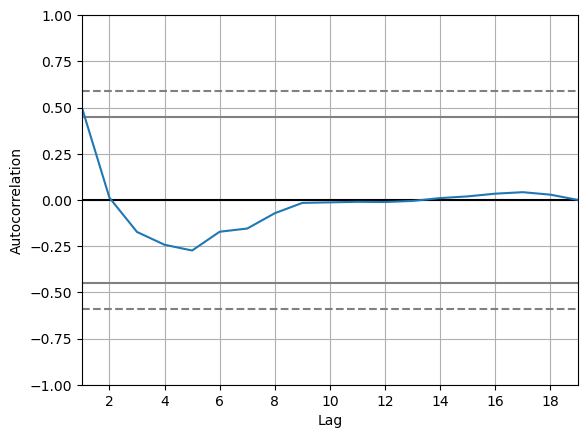

In [15]:
pd.plotting.autocorrelation_plot(df_diff.dropna().iloc[:,1])

### drop first few "0" years

In [12]:
df_diff = df_diff.tail(19)
df = df.tail(19)

df_diff

,crispr,patents filed Count
Year,,
2003-01-01,-0.009,0.0
2004-01-01,-0.012,0.0
2005-01-01,0.558,3.0
2006-01-01,0.219,8.0
2007-01-01,1.228,-3.0
2008-01-01,1.184,14.0
2009-01-01,1.099,10.0
2010-01-01,1.288,-19.0
2011-01-01,2.794,7.0


### Correlation
* Also first orer differenced correlation (removes linear trend)

In [13]:
df.corr()

,crispr,patents filed Count
crispr,1.000,0.938
patents filed Count,0.938,1.000


In [14]:
df_diff.corr()

,crispr,patents filed Count
crispr,1.00,0.64
patents filed Count,0.64,1.00


In [15]:
df_diff["crispr"]

Year
2003-01-01    -0.009
2004-01-01    -0.012
2005-01-01     0.558
2006-01-01     0.219
2007-01-01     1.228
2008-01-01     1.184
2009-01-01     1.099
2010-01-01     1.288
2011-01-01     2.794
2012-01-01     4.782
2013-01-01    15.395
2014-01-01    29.123
2015-01-01    49.296
2016-01-01    71.234
2017-01-01    71.517
2018-01-01    70.632
2019-01-01    58.972
2020-01-01     6.088
2021-01-01    15.280
Name: crispr, dtype: float64

### lag/causal correlation


In [16]:
df_diff.corr().round(3)

,crispr,patents filed Count
crispr,1.00,0.64
patents filed Count,0.64,1.00


In [17]:
df_diff["crispr"].shift(1).corr(df_diff["patents filed  Count"]).round(3)

0.459

#### patents filed the previous year is a leading indicator! Stronger than same year


In [18]:
df_diff["patents filed  Count"].shift(1).corr(df_diff["crispr"]).round(3)

0.745

In [19]:
# df_diff["crispr"].shift(-1).corr(df_diff["patents filed  Count"]).round(3) ## identical to above

* Undifferenced :

In [20]:
df["crispr"].shift(1).corr(df["patents filed  Count"]).round(3)

0.887

#### patents filed the previous year is a super strong causal predictor (without differencing)


In [21]:
df["patents filed  Count"].shift(1).corr(df["crispr"]).round(3)

0.985

In [22]:
print("Same year patents:")
df["patents filed  Count"].corr(df["crispr"]).round(3)

Same year patents:


0.938

In [23]:
print("Future patents:")
df["patents filed  Count"].shift(-1).corr(df["crispr"]).round(3)

Future patents:


0.887

In [24]:
print("Cross-correlation between patents and lags for different (Year) lags:")
for i in range(-6,6):#[-1,0,1,2]:
#     print(i,df_g.apply(lambda df: df['y_raw'].corr(df['patent_count'].shift(i))).mean().round(3))
    print(i,df["crispr"].corr(df["patents filed  Count"].shift(i)).mean().round(3))

Cross-correlation between patents and lags for different (Year) lags:
-6 0.436
-5 0.503
-4 0.604
-3 0.704
-2 0.794
-1 0.887
0 0.938
1 0.985
2 0.943
3 0.888
4 0.826
5 0.752


matplotlib xcorr has different results?

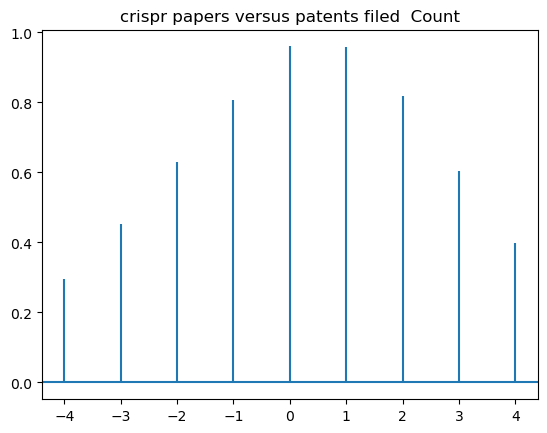

<Figure size 640x480 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt
from matplotlib import mlab
### https://stackoverflow.com/questions/55535226/how-to-make-a-correlation-plot-with-a-certain-lag-of-two-time-series

### https://stackoverflow.com/questions/69117617/how-to-find-the-lag-between-two-time-series-using-cross-correlation

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlation_lags.html

plt.xcorr(df["crispr"], df["patents filed  Count"], maxlags=4) # normed=True,   usevlines=True,
plt.title("crispr papers versus patents filed  Count")
plt.show()
plt.clf() 

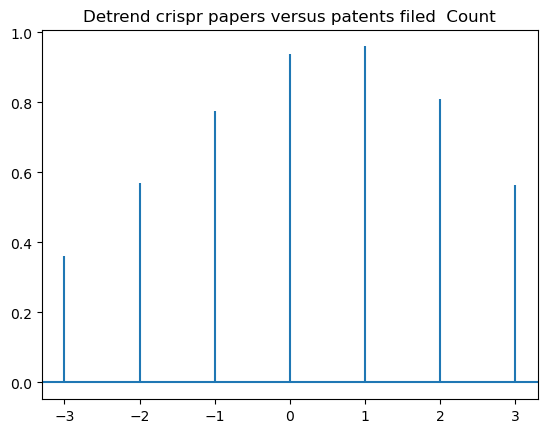

<Figure size 640x480 with 0 Axes>

In [32]:
plt.xcorr(df["crispr"], df["patents filed  Count"], maxlags=3, detrend=mlab.detrend) #subtract sample mean
plt.title("Detrend crispr papers versus patents filed  Count")
plt.show()
plt.clf() 

In [26]:
display(df["patents filed  Count"].head(3))

Year
2003-01-01    0
2004-01-01    0
2005-01-01    3
Name: patents filed  Count, dtype: int64

In [27]:
display(df["patents filed  Count"].shift(1).head(3))
display(df["crispr"].shift(1).head(3))

Year
2003-01-01    NaN
2004-01-01    0.0
2005-01-01    0.0
Name: patents filed  Count, dtype: float64

Year
2003-01-01      NaN
2004-01-01    0.168
2005-01-01    0.156
Name: crispr, dtype: float64